# *SQL e Python no Mundo do Futebol e suas possíveis aplicações*

## <u>Com Python...<u/>

Para o  Algoritmo Knn simulei uma situação onde conto com um dataset com diversas informações classificando as pessoas que recebem  mais ou menos que 25 mil reais anuais, sendo essas pessoas, sócios torcedores de um time x. O objetivo é funcionar como uma empresa que vende relatórios de inteligência para que possam ser aproveitados pelos clubes de futebol.

##### O que é KNN (K Nearest Neighbor)?
O KNN é um algoritmo não pramétrico, aonde a estrutura do modelo será determinada pelo dataset utilizado. Este algoritmo também é conhecido como de aprendizado lento ou melhor dizendo, é um algoritmo preguiçoso, o termo certo é “lazy”. Os algoritmos do tipo lazy, não necessitam de dados de treinamento para se gerar o modelo, o que diminui em partes o processo inicial, mas em contrapartida gerará uma necessidade de analise posterior mais apurada. No caso de algoritmos que não necessitam de treinamento, todos os dados obtidos no dataset serão utilizados na fase de teste, resultando em um treinamento muito rápido e em um teste e validação lentos, momento o qual necessitamos estar bem atentos aos resultados gerados.

##### Como fuinciona o algoritmo KNN (K Nearest Neighbor)?
Neste algoritmo possuímos uma variável chamada de K, a qual é parte do nome do modelo e também o principal parâmetro a ser selecionado. Este parâmetro direcionará a quantidade de vizinhos (neighborn em inglês). Em casos de modelos binários, aonde possuímos apenas duas classes, em geral aplicasse valores ímpares a K, mas lembre que cada caso é um caso, “No free lunch”. Imagine que temos um valor P1 o qual queremos predizer, entre um grupo de duas classes aonde o valor atribuído a K foi 1 (K=1), primeiro iremos identificar o ponto mais próximo a ele e depois qual a label que o identifica (classe A por exemplo)

![](Images/knn1.JPG)

Após identificar o ponto mais próximo e identificar a label deste ponto (Ex.: Classe A), iremos predizer a que classe o ponto P1 faz parte. Para identificar de fato a que grupo o ponto P1 faz parte, iremos realizar uma votação aonde a maioria irá dizer a que classe este ponto P1 realmente faz parte. Iremos utilizar medida de distância para identificar a distância existente entre o ponto P1 e os demais pontos do meu dataset, como K=1 o algoritmo irá verificar ponto a ponto, caso coloque o valor K=3 ele ira olhar a distância de P1 em relação a 3 pontos. Desta forma termos e distância existente entre P1 e todos os pontos do meu dataset, assim conseguiremos saber a quais pontos P1 é mais próximo, desta forma teremos qual classe ele é mais similar. Assim a “votação” será concluída, e saberemos como classificar P1.

##### Para encontrarmos a distância entre os pontos poderemos utilizar as seguintes medidas:
1. Distância Euclidiana
2. Distância de Hamming
3. Distância Manhattan
4. Distância de Markowski

##### Os passos realizados pelo algoritmo são:
1. Calcular a distância
2. Encontrar os pontos/vizinhos mais próximos
3. Votar a label para o ponto a ser previsto

![](Images/knn2.JPG)

##### Saindo um pouco da prate teórica... Indo para a parte prática

#### Importando todas as bibliotecas necessárias

In [1]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import joblib

%matplotlib inline
mpl.rcParams['figure.dpi']= 100

#### Leitura dos dataframes

In [2]:
df = pd.read_csv('adult2.csv',names=[
        "Idade", "Classe de Trabalho", "Peso Final", "Educacao", "Id_Educacao", "Estado Civil",
        "Ocupacao", "Relacao", "Raca", "Sexo", "Ganho de Capital", "Perda de Capital",
        "Horas-Por-Semana", "Nacionalidade", "Ganho Anual"], # Traduzindo colunas para o português
        sep=r'\s*;\s*',
        engine='python',
        na_values="?", skiprows = 1).dropna() # Linha de código feita para excluir linhas que contém dados faltantes

#### dfteste criado para descobrir o melhor k posteriormente no algoritmo knn

In [3]:
dfteste = pd.read_csv('adult2.csv',names=[
        "Idade", "Classe de Trabalho", "Peso Final", "Educacao", "Id_Educacao", "Estado Civil",
        "Ocupacao", "Relacao", "Raca", "Sexo", "Ganho de Capital", "Perda de Capital",
        "Horas-Por-Semana", "Nacionalidade", "Ganho Anual"],
        sep=r'\s*;\s*',
        engine='python',
        na_values="?", skiprows = 1).dropna()
# O mesmo procedimento feito no df é feito no dfteste
df

,Idade,Classe de Trabalho,Peso Final,Educacao,Id_Educacao,Estado Civil,Ocupacao,Relacao,Raca,Sexo,Ganho de Capital,Perda de Capital,Horas-Por-Semana,Nacionalidade,Ganho Anual
0,50,Trabalhador-nao-autonomo,83311,Bacharelado,13,Conjuge-civ-casado,Executivo-gerencial,Marido,Branco,Masculino,0,0,13,Brasil,<=25K
1,38,Privado,215646,Formado-EM,9,Divorciado,Limpeza,Nao-membro-da-familia,Branco,Masculino,0,0,40,Brasil,<=25K
2,53,Privado,234721,2-colegial,7,Conjuge-civ-casado,Limpeza,Marido,Negro,Masculino,0,0,40,Brasil,<=25K
3,28,Privado,338409,Bacharelado,13,Conjuge-civ-casado,Profissional-especializado,Esposa,Negro,Feminino,0,0,40,Brasil,<=25K
4,37,Privado,284582,Mestrado,14,Conjuge-civ-casado,Executivo-gerencial,Esposa,Branco,Feminino,0,0,40,Brasil,<=25K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Privado,257302,Associacao-academica,12,Conjuge-civ-casado,Suporte-Tecnico,Esposa,Branco,Feminino,0,0,38,Brasil,<=25K
32556,40,Privado,154374,Formado-EM,9,Conjuge-civ-casado,Operador-maquina,Marido,Branco,Masculino,0,0,40,Brasil,>25K
32557,58,Privado,151910,Formado-EM,9,Viuvo,Assistente-administrativo,Nao-casado,Branco,Feminino,0,0,40,Brasil,<=25K
32558,22,Privado,201490,Formado-EM,9,Nunca-casou,Assistente-administrativo,Filho-proprio,Branco,Masculino,0,0,20,Brasil,<=25K


#### df é igual ao dfteste

### Funções utilizadas para descobrir o melhor K possível

In [4]:
# Função 'sepData' 
def sepData(data, listOfIndexes):
    base = data.iloc[:,0:0] # Iloc: Indexação puramente baseada em localização inteira para seleção por posição 
    for index, element in enumerate(listOfIndexes):
        if element == 1:
            base = pd.concat([base, data.iloc[:,index:index+1]], sort=False, axis=1)
    return base

# Função 'melhor_classif'
def melhor_classif(featuresList, KRange, trainingData, testingData):
    
    # Função 'sepData' utilizada para os argumentos de treino do dataset
    XAdult = sepData(trainingData, featuresList)
    
    # Função 'sepData' utilizada para as classes de treino do dataset(classificação final)
    YAdult = trainingData.iloc[:,14:15]

    # Função 'sepData' utilizada para os argumentos de treino do dataset
    XAdultTest = sepData(testingData, featuresList)
    
    # Função 'sepData' utilizada para as classes de treino do dataset(classificação final)
    YAdultTest = testingData.iloc[:,14:15]
    
    # Lista 'classifiers',e laço for utilizando o KRange(Intervalo do K)
    classifiers = []
    for i in range(KRange[0], KRange[1]+1):
        classifiers.append(KNeighborsClassifier(n_neighbors=i))
        
    for index, element in enumerate(classifiers):
        element.fit(XAdult, YAdult)
        
    # Lista 'predictions',e laço for utilizando a lista 'classifiers'   
    predictions = []
    for index, element in enumerate(classifiers):
        predictions.append(element.predict(XAdultTest))
        
    # Lista 'accuracies',e laço for utilizando a lista 'predictions'
    accuracies = []
    for element in predictions:
        accuracies.append(accuracy_score(YAdultTest, element))
        
    # Retorna o classificador com a acurácia máxima dentre todos os classificadores
    return max(accuracies), accuracies.index(max(accuracies))+KRange[0], classifiers[accuracies.index(max(accuracies))]

#### Substituindo df e dfteste por df's novos

In [5]:
df_novo = df
dfteste_novo = dfteste

### Transformando as 'str' do dataset em números para o treinamento dos algoritmos

In [6]:
# Função 'embar_atrib'
def embar_atrib(atributo, alvo):
    dic_em_branco = {}
    localTargetData = {}
    for index, element in enumerate(atributo):
        if element not in localTargetData:
            if alvo[index] == '<=25K':
                localTargetData[element] = [1,0]
            else:
                localTargetData[element] = [0,1]
        else:
            if alvo[index] == '<=25K':
                localTargetData[element][0] +=1
            else:
                localTargetData[element][1] += 1
    return localTargetData

In [7]:
# Laço for responsável por fazer as trocas de 'str' por 'float' nos df's
for i in (1,3,5,6,7,8,9,13):
    replaceDict = embar_atrib(df_novo.iloc[:,i:i+1].values.transpose()[0].tolist(),df_novo.iloc[:,df_novo.shape[1]-1:df_novo.shape[1]].values.transpose()[0].tolist())
    for key in replaceDict:
        df_novo = df_novo.replace(key, replaceDict[key][1]/(replaceDict[key][1]+replaceDict[key][0]))
        dfteste_novo = dfteste_novo.replace(key, replaceDict[key][1]/(replaceDict[key][1]+replaceDict[key][0]))
        print('Trocando {0} por {1}'.format(key, replaceDict[key][1]/(replaceDict[key][1]+replaceDict[key][0]) ))

Trocando Trabalhador-nao-autonomo por 0.2849271940181031
Trocando Privado por 0.21867289390200917
Trocando Chefe-de-estado por 0.27216653816499614
Trocando Governo-federal por 0.38645833333333335
Trocando Governo-municipal por 0.29479216435738176
Trocando Trabalhador-autonomo por 0.557347670250896
Trocando Sem-remuneracao por 0.0
Trocando Bacharelado por 0.4199961397413627
Trocando Formado-EM por 0.16342295345104335
Trocando 2-colegial por 0.056818181818181816
Trocando Mestrado por 0.5617910447761194
Trocando 9-ano por 0.056155507559395246
Trocando Faculdade por 0.19955719557195573
Trocando Associacao-academica por 0.25392156862745097
Trocando Curso-profissionalizante por 0.2634367903103709
Trocando 7ou8-ano por 0.06631762652705062
Trocando Doutorado por 0.7412060301507538
Trocando Pos-graduado por 0.7437275985663082
Trocando 5ou6-ano por 0.0462046204620462
Trocando 1-colegial por 0.07220216606498195
Trocando Pre-escola por 0.0
Trocando 3-colegial por 0.07888040712468193
Trocando 1ou4-

#### Substituindo as classes finais (>25K por 1; <=25K por 0) 

In [8]:
df_novo = df_novo.replace('>25K', 1)
df_novo = df_novo.replace('<=25K',0)
dfteste_novo = dfteste_novo.replace('>25K', 1)
dfteste_novo = dfteste_novo.replace('<=25K',0)

### Novo dataset

In [9]:
df_novo

,Idade,Classe de Trabalho,Peso Final,Educacao,Id_Educacao,Estado Civil,Ocupacao,Relacao,Raca,Sexo,Ganho de Capital,Perda de Capital,Horas-Por-Semana,Nacionalidade,Ganho Anual
0,50,0.284927,83311,0.419996,13,0.454774,0.484014,0.455683,0.264030,0.313802,0,0,13,0.249048,0
1,38,0.218673,215646,0.163423,9,0.107327,0.062774,0.106562,0.264030,0.313802,0,0,40,0.249048,0
2,53,0.218673,234721,0.056818,7,0.454774,0.062774,0.455683,0.129942,0.313802,0,0,40,0.249048,0
3,28,0.218673,338409,0.419996,13,0.454774,0.449034,0.491289,0.129942,0.113494,0,0,40,0.249048,0
4,37,0.218673,284582,0.561791,14,0.454774,0.484014,0.491289,0.264030,0.113494,0,0,40,0.249048,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,0.218673,257302,0.253922,12,0.454774,0.304957,0.491289,0.264030,0.113494,0,0,38,0.249048,0
32556,40,0.218673,154374,0.163423,9,0.454774,0.124875,0.455683,0.264030,0.313802,0,0,40,0.249048,1
32557,58,0.218673,151910,0.163423,9,0.096429,0.134518,0.066035,0.264030,0.113494,0,0,40,0.249048,0
32558,22,0.218673,201490,0.163423,9,0.048633,0.134518,0.014586,0.264030,0.313802,0,0,20,0.249048,0


### Descobrindo o melhor K

In [10]:
acc, k, bestClass = melhor_classif(([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0]), (10,30), df_novo, dfteste_novo)
print(f'Melhor Classificador com K = {k}')

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

Melhor Classificador com K = 11


#### Melhor K = 11

### Aplicando o algoritmo Knn

In [11]:
# Atributos a serem considerados
X = np.array(df_novo.drop('Ganho Anual',1))
X

array([[5.00000000e+01, 2.84927194e-01, 8.33110000e+04, ...,
        0.00000000e+00, 1.30000000e+01, 2.49047759e-01],
       [3.80000000e+01, 2.18672894e-01, 2.15646000e+05, ...,
        0.00000000e+00, 4.00000000e+01, 2.49047759e-01],
       [5.30000000e+01, 2.18672894e-01, 2.34721000e+05, ...,
        0.00000000e+00, 4.00000000e+01, 2.49047759e-01],
       ...,
       [5.80000000e+01, 2.18672894e-01, 1.51910000e+05, ...,
        0.00000000e+00, 4.00000000e+01, 2.49047759e-01],
       [2.20000000e+01, 2.18672894e-01, 2.01490000e+05, ...,
        0.00000000e+00, 2.00000000e+01, 2.49047759e-01],
       [5.20000000e+01, 5.57347670e-01, 2.87927000e+05, ...,
        0.00000000e+00, 4.00000000e+01, 2.49047759e-01]])

In [12]:
# Classe Final
y = np.array(df_novo['Ganho Anual'])
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [13]:
# Algoritmo Knn com o melhor k possível
knn = KNeighborsClassifier(n_neighbors=11)

In [14]:
# Normalização dos valores X e Y com a função 'fit()'
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=11)

#### Pessoa Criada para o cálculo do Knn, funcionando como se fosse um cadastro de um novo fiel torcedor

In [15]:
idade = 28
class_trab = 0.284927 #Trabalhador não autonômo
pf = 151910 
edu =  0.41999613 #Bacharelado
id_edu = 13 
est_civ = 0.068821 # Separado
ocup = 0.06277372 # Limpeza
relac = 0.106561546 # Não membro da Família 
raca = 0.264030418 # Branco
sexo = 0.313801895 # Masculino
ganhocap = 0
perdacap = 0
hrs = 27
nac = 0.24904775 # Brasileiro

Exemplo = knn.predict([[idade,class_trab,pf,edu,id_edu,est_civ,ocup,relac,raca,sexo,ganhocap,perdacap,hrs,nac]])
if Exemplo == 0:
    print("Ganho Anual: <=25K")
else:
    print("Ganho Anual: >25K")

Ganho Anual: <=25K


Com os atributos fornecidos, o Knn classifica a pessoa ganhando menos de 25K

### Gráfico Quantidade de pessoas X Ganho anual

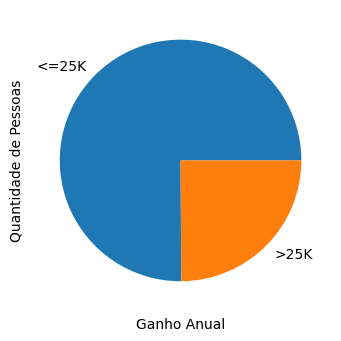

In [16]:
df['Ganho Anual'].value_counts().plot(kind='pie')
plt.xlabel('Ganho Anual')
plt.ylabel('Quantidade de Pessoas');

É nitida a diferença de uma classe para outra, sendo 3X maior o número de sócios torcedores que ganham menos de 25K anuais, nossas análises podem servir para o clube, em forma dele resolver abaixar o preço dos ingressos para uma maior lotação dos estádios, criar promoções para o público alvo que no caso seria a parte azul da "pizza", enfim, existem 'n' possibilidades que a diretoria de um clube pode fazer com essa análise.

### Avaliando o classificador Knn

In [17]:
# Separando os X's e Y's para teste e treino (30% dos dados serão utilizados para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 13) 

In [18]:
# Normalização dos valores X_train e Y_train com a função 'fit()'
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [19]:
# y_pred = valores preditos
y_pred = knn.predict(X_test)

In [20]:
# Métricas de Avaliação: F1, Precisão, Recall e Acurácia
print(classification_report(y_test, y_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      6880
           1       0.70      0.24      0.36      2336

    accuracy                           0.78      9216
   macro avg       0.75      0.60      0.61      9216
weighted avg       0.77      0.78      0.74      9216



![](Images/metricas.JPG)

In [21]:
# Matriz de confusão
confusion_matrix(y_test, y_pred)

array([[6643,  237],
       [1776,  560]], dtype=int64)

![](Images/Matriz1.JPG)
![](Images/Matriz2.JPG)

Das 8419 pessoas da amostra que ganham menos de 25K, 6643 foram previstas corretamente, enquanto 1776 foram preditas ganhando mais de 25K. Já das 797 pessoas da amostra que ganham mais de 25K, 560 foram previstas corretamente, enquanto 237 foram preditas ganhando menos de 25K.

### Persistindo o algoritmo Knn com o joblib

In [22]:
arq_knn = 'Knn_SocioTorcedor.sav'
joblib.dump(knn,arq_knn)

['Knn_SocioTorcedor.sav']

In [23]:
knn_carregado = joblib.load(arq_knn)
resultado = knn_carregado.score(X_test, y_test)
print(resultado)

0.7815755208333334


#### ACURÁCIA FINAL = 78,1%